In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [22]:
df = pd.read_excel("./data/Ogundoyin_Jan_2022.xlsx")


In [23]:
# select relevant datafields
slctdt = ["AGE (YR)", "SEX" ,"SYMPTOMATIC", "COMMENTS(TRAVEL HISTORY)", "COMMENTS (CONTACT)", "FEVER (DEGREE CELCIOUS)", "SUBJECTIVE FEVER (felt feverish)", "CHILLS", "MUSCLE ACHES (MYALGIA)", "RUNNY NOSE", "SORE THROAT", "COUGH", "SHORTNESS OF BREATH", "NAUSEA", "HEADACHE", "ABDOMINAL PAIN", "DIARRHEA", "CHRONI LUNG DISEASE", "DIABETES MELLITUS", "CARDIOVASCULAR", "CHRONIC RENAL DISEASE", "CHRNIC LIVER DISEASE", "IMMUNOCOMPROMISED CONDITION", "NEUROLOGIC/NEURODEVELOPMENT", "OTHER CHRONIC CONDITION", "IF FEMALE, CURRENTLY PREGNANT", "CURRENT SMOKER", "FORMER SMOKER", "FINAL RESULT INTERPRETATION. (POSITIVE, NEGATIVE, OR DISCARDED)"]
df = df[slctdt]
# rename variables
field_names = {
    "AGE (YR)": "Age",
    "SEX": "Sex",
    "COMMENTS(TRAVEL HISTORY)": "Travel_History",
    "COMMENTS (CONTACT)": "Contact_With_Infected", 
    "FEVER (DEGREE CELCIOUS)": "Fever", 
    "SUBJECTIVE FEVER (felt feverish)": "Subjective_Fever", 
    "CHILLS": "Chills", 
    "MUSCLE ACHES (MYALGIA)": "Muscle_Ache", 
    "RUNNY NOSE": "Runny_Nose", 
    "SORE THROAT": "Sore_throat", 
    "COUGH": "Cough", 
    "SHORTNESS OF BREATH": "Shortness_Of_Breath", 
    "NAUSEA": "Nausea", 
    "HEADACHE": "Headache", 
    "ABDOMINAL PAIN": "Abdominal_Pain", 
    "DIARRHEA": "Diarrhea", 
    "CHRONI LUNG DISEASE": "Chronic_Lung_Disease", 
    "DIABETES MELLITUS": "Diabetes_Mellitus", 
    "CARDIOVASCULAR": "Cardiovascular", 
    "CHRONIC RENAL DISEASE": "Chronic_Renal_Disease", 
    "CHRNIC LIVER DISEASE": "Chronic_Liver_Disease", 
    "IMMUNOCOMPROMISED CONDITION": "Immunocompromised_Condition", 
    "NEUROLOGIC/NEURODEVELOPMENT": "Neurological_Neurodevelopment", 
    "OTHER CHRONIC CONDITION": "Other_Chronic_Condition", 
    "IF FEMALE, CURRENTLY PREGNANT": "Is_Currently_Pregrant_Female", 
    "CURRENT SMOKER": "Current_Smoker", 
    "FORMER SMOKER": "Former_Smoker", 
    "SYMPTOMATIC": "Symptomatic",
    "FINAL RESULT INTERPRETATION. (POSITIVE, NEGATIVE, OR DISCARDED)": "Outcome"     
}
df.rename(columns=field_names, inplace=True)
# df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)

In [24]:
df.head()

,Age,Sex,SYMPTOMATIC,Travel_History,Contact_With_Infected,Fever,Subjective_Fever,Chills,Muscle_Ache,Runny_Nose,...,Cardiovascular,Chronic_Renal_Disease,Chronic_Liver_Disease,Immunocompromised_Condition,Neurological_Neurodevelopment,Other_Chronic_Condition,Is_Currently_Pregrant_Female,Current_Smoker,Former_Smoker,Outcome
0,48,F,NO,NO,NO,NO,YES,NO,YES,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NEGATIVE
1,16,M,NO,NO,NO,YES,YES,NO,NO,YES,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NEGATIVE
2,63,F,YES,NO,NO,NO,NO,NO,NO,NO,...,YES,NO,NO,NO,NO,NO,NO,NO,NO,POSITIVE
3,39,M,NO,NO,NO,NO,NO,NO,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NEGATIVE
4,40,F,NO,NO,NO,36.5,NO,NO,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NEGATIVE


In [25]:
to_num = {
    "Sex": {"F": 0, "M":1},
    "Travel_History": {"NO": 0, "YES":1},
    "Contact_With_Infected": {"NO": 0, "YES":1}, 
    "Fever": {"NO": 0, "YES":1}, 
    "Subjective_Fever": {"NO": 0, "YES":1},
    "Chills": {"NO": 0, "YES":1},
    "Muscle_Ache": {"NO": 0, "YES":1}, 
    "Runny_Nose": {"NO": 0, "YES":1}, 
    "Sore_throat": {"NO": 0, "YES":1}, 
    "Cough": {"NO": 0, "YES":1}, 
    "Shortness_Of_Breath": {"NO": 0, "YES":1}, 
    "Nausea": {"NO": 0, "YES":1}, 
    "Headache": {"NO": 0, "YES":1}, 
    "Abdominal_Pain": {"NO": 0, "YES":1}, 
    "Diarrhea": {"NO": 0, "YES":1}, 
    "Chronic_Lung_Disease": {"NO": 0, "YES":1}, 
    "Diabetes_Mellitus": {"NO": 0, "YES":1}, 
    "Cardiovascular": {"NO": 0, "YES":1}, 
    "Chronic_Renal_Disease": {"NO": 0, "YES":1}, 
    "Chronic_Liver_Disease": {"NO": 0, "YES":1}, 
    "Immunocompromised_Condition": {"NO": 0, "YES":1}, 
    "Neurological_Neurodevelopment": {"NO": 0, "YES":1}, 
    "Other_Chronic_Condition": {"NO": 0, "YES":1}, 
    "Is_Currently_Pregrant_Female": {"NO": 0, "YES":1}, 
    "Current_Smoker": {"NO": 0, "YES":1}, 
    "Former_Smoker": {"NO": 0, "YES":1}, 
    "Outcome": {"NEGATIVE": 0, "POSITIVE":1}  
}
df = df.replace(to_num)

In [30]:
df.dropna(inplace=True)
df


,Age,Sex,SYMPTOMATIC,Travel_History,Contact_With_Infected,Fever,Subjective_Fever,Chills,Muscle_Ache,Runny_Nose,...,Cardiovascular,Chronic_Renal_Disease,Chronic_Liver_Disease,Immunocompromised_Condition,Neurological_Neurodevelopment,Other_Chronic_Condition,Is_Currently_Pregrant_Female,Current_Smoker,Former_Smoker,Outcome
0,48,0.0,NO,0.0,0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
1,16,1.0,NO,0.0,0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
2,63,0.0,YES,0.0,0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0
3,39,1.0,NO,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
4,40,0.0,NO,0.0,0,36.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3382,27,0.0,NO,0.0,0,36.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0
3386,56,0.0,NO,0.0,0,36.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
3387,61,1.0,NO,0.0,0,36.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
3404,51,1.0,YES,0.0,0,35.8,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0


In [72]:
df2 = pd.read_excel("./data/temview.xlsx")
df2 = df2.iloc[: , 1:]
df2.rename(columns={"SYMPTOMATIC": "Symptomatic"}, inplace=True)
df2.replace({"Symptomatic": {"NO": 0, "YES": 1}}, inplace=True)

In [64]:
# df3 = df["Age", "Sex", "Symptomatic", "Outcome"]
pearson_corr = df2.corr(method="pearson")
pearson_corr

,Age,Sex,Travel_History,Contact_With_Infected,Fever,Subjective_Fever,Chills,Muscle_Ache,Runny_Nose,Sore_throat,...,Cardiovascular,Chronic_Renal_Disease,Chronic_Liver_Disease,Immunocompromised_Condition,Neurological_Neurodevelopment,Other_Chronic_Condition,Is_Currently_Pregrant_Female,Current_Smoker,Former_Smoker,Outcome
Age,1.000000,0.170724,NaN,NaN,0.049489,0.084889,0.056295,0.059882,0.018932,0.045134,...,0.072510,0.074960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042836
Sex,0.170724,1.000000,NaN,NaN,0.026877,0.036366,0.040782,0.001318,-0.026600,0.026877,...,-0.096023,0.028814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.120738
Travel_History,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contact_With_Infected,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fever,0.049489,0.026877,NaN,NaN,1.000000,0.543763,0.630938,0.253648,0.668490,0.395185,...,-0.006207,-0.003578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.018020
Subjective_Fever,0.084889,0.036366,NaN,NaN,0.543763,1.000000,0.284976,0.705408,0.403662,0.359576,...,-0.006805,0.406617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009063
Chills,0.056295,0.040782,NaN,NaN,0.630938,0.284976,1.000000,0.405964,0.350725,0.312937,...,-0.003916,-0.002257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.036247
Muscle_Ache,0.059882,0.001318,NaN,NaN,0.253648,0.705408,0.405964,1.000000,0.284746,0.513502,...,-0.004800,-0.002767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006393
Runny_Nose,0.018932,-0.026600,NaN,NaN,0.668490,0.403662,0.350725,0.284746,1.000000,0.443269,...,-0.005547,-0.003197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.051343
Sore_throat,0.045134,0.026877,NaN,NaN,0.395185,0.359576,0.312937,0.513502,0.443269,1.000000,...,-0.006207,-0.003578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021410


In [74]:
df3 = df2[["Age", "Sex", "Symptomatic", "Outcome"]].copy()
pearson_corr = df3.corr(method="pearson")
pearson_corr

,Age,Sex,Symptomatic,Outcome
Age,1.000000,0.170724,0.137942,0.042836
Sex,0.170724,1.000000,-0.057683,-0.120738
Symptomatic,0.137942,-0.057683,1.000000,0.092493
Outcome,0.042836,-0.120738,0.092493,1.000000


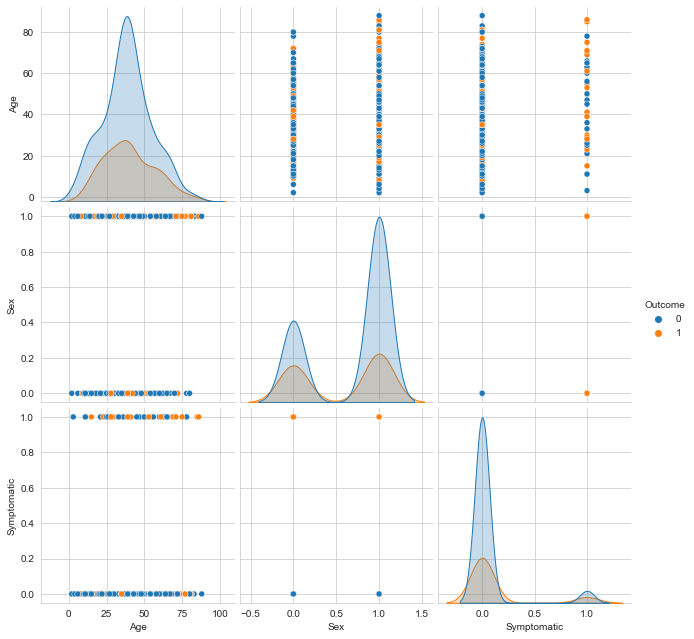

In [77]:
plt.close();

sns.set_style("whitegrid");

sns.pairplot(df3, hue="Outcome", height=3);

plt.savefig("correlation_plot.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
sns.set_style("whitegrid")

sns.FacetGrid(df, hue='Outcome', size=5).map(plt.scatter, 'Age', 'Outcome').add_legend();

plt.savefig('age_outcome_impact.png', dpi=300, bbox_inches="tight");

plt.show()

In [80]:
df3.to_excel("./data/cleaned_data.xlsx")

In [83]:
y_data = df3['Outcome']
x_data = df3.drop(['Outcome'], axis=1)
MinMaxScaler = preprocessing.MinMaxScaler()

X_data_minmax = MinMaxScaler.fit_transform(x_data)

data = pd.DataFrame(X_data_minmax, columns=["Age", "Sex", "Symptomatic"])

In [84]:
X_train, X_test, y_train, y_test = train_test_split(data, y_data, test_size=0.2, random_state=1)

Fitting a support vector machine model to data

In [87]:
svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [88]:
svm_filename = 'SVM_MODEL.sav'
pickle.dump(svm_clf, open(svm_filename, 'wb'))

In [91]:
# testing the model
svm_ypred = svm_clf.predict(X_test)
# taking the 
svm_result = confusion_matrix(y_test, svm_ypred)
print("Confusion Matrix: ")
print(svm_result)

svm_result1 = classification_report(y_test, svm_ypred)
print("Classification Report: ")
print(svm_result1)

svm_result2 = accuracy_score(y_test, svm_ypred)
print("Accuracy: ", svm_result2)




Confusion Matrix: 
[[87  0]
 [39  0]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.69      1.00      0.82        87
           1       0.00      0.00      0.00        39

    accuracy                           0.69       126
   macro avg       0.35      0.50      0.41       126
weighted avg       0.48      0.69      0.56       126

Accuracy:  0.6904761904761905


C:\Users\Jenyo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jenyo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jenyo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
y_data

0      0
1      0
2      1
3      0
4      0
      ..
623    0
624    1
625    0
626    0
627    0
Name: Outcome, Length: 628, dtype: int64

In [108]:
NX_train = x_data.iloc[:400, 0:3].copy()
ny_train = y_data.iloc[:400, ].copy()

NX_test = x_data.iloc[400:, 0:3].copy()
ny_test = y_data.iloc[400:,].copy()



In [109]:
nsvm_clf = svm.SVC()
nsvm_clf.fit(NX_train, ny_train)

SVC()

In [112]:
# testing the model
nsvm_ypred = nsvm_clf.predict(NX_test)
# taking the 
nsvm_result = confusion_matrix(ny_test, nsvm_ypred)
print("Confusion Matrix: ")
print(nsvm_result)

nsvm_result1 = classification_report(ny_test, nsvm_ypred)
print("Classification Report: ")
print(nsvm_result1)

nsvm_result2 = accuracy_score(ny_test, nsvm_ypred)
print("Accuracy: ", nsvm_result2)

Confusion Matrix: 
[[167   0]
 [ 61   0]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.73      1.00      0.85       167
           1       0.00      0.00      0.00        61

    accuracy                           0.73       228
   macro avg       0.37      0.50      0.42       228
weighted avg       0.54      0.73      0.62       228

Accuracy:  0.7324561403508771


C:\Users\Jenyo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jenyo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jenyo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [114]:
y_data.value_counts()

0    445
1    183
Name: Outcome, dtype: int64

C:\Users\Jenyo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


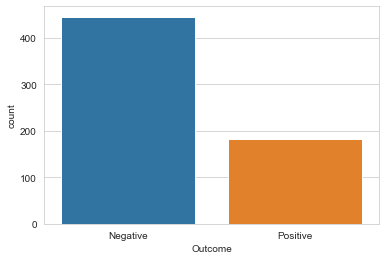

In [117]:
det_class_bal = sns.countplot(df3['Outcome'])
det_class_bal.set_xticklabels(['Negative', 'Positive'])
plt.show()

In [119]:
outcome_class_Negative = df3[df3['Outcome'] == 0]
outcome_class_Positive = df3[df3['Outcome'] == 1]
print('Negative: ', outcome_class_Negative.shape)
print('Positive: ', outcome_class_Positive.shape)

Negative:  (445, 4)
Positive:  (183, 4)


In [8]:
fresh_data = pd.read_excel("./data/cleaned_data.xlsx")


In [25]:
fresh_y = fresh_data["Outcome"].copy()
fresh_x = fresh_data[["Age", "Sex", "Symptomatic"]].copy()
# fresh_y.shape

outcome_class_Negative = fresh_data[fresh_data['Outcome'] == 0]
outcome_class_Positive = fresh_data[fresh_data['Outcome'] == 1]
print('Negative: ', outcome_class_Negative.shape)
print('Positive: ', outcome_class_Positive.shape)

fresh_x.shape

Negative:  (445, 5)
Positive:  (183, 5)


(628, 3)

Handling data imbalance using undersampling

In [81]:
import numpy as np
# labeled confusion matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']



In [36]:
# !pip install imblearn
# import imblearn
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)
x_rus, y_rus = rus.fit_resample(fresh_x, fresh_y)

rusX_train, rusX_test, rusy_train, rusy_test = train_test_split(x_rus, y_rus, test_size=0.2, random_state=1)
rus_svm_clf = svm.SVC()
rus_svm_clf.fit(rusX_train, rusy_train)

SVC()

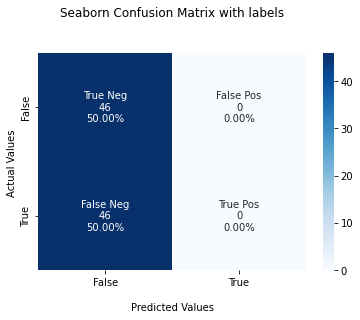

Classification Report: 
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        46
           1       0.00      0.00      0.00        46

    accuracy                           0.50        92
   macro avg       0.25      0.50      0.33        92
weighted avg       0.25      0.50      0.33        92

Accuracy:  0.5


In [86]:
# testing the model
rus_svm_ypred = rus_svm_clf.predict(rusX_test)
# taking the 
rus_svm_result = confusion_matrix(rusy_test, rus_svm_ypred)
group_counts = ["{0:0.0f}".format(value) for value in rus_svm_result.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     rus_svm_result.flatten()/np.sum(rus_svm_result)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(rus_svm_result, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


rus_svm_result1 = classification_report(rusy_test, rus_svm_ypred)
print("Classification Report: ")
print(rus_svm_result1)

rus_svm_result2 = accuracy_score(rusy_test, rus_svm_ypred)
print("Accuracy: ", rus_svm_result2)

>Output data visualization settings

>**Handling data imbalance using oversampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

# fit predictor and target variablex_ros, y_ros = ros.fit_resample(x, y)
x_ros, y_ros = ros.fit_resample(fresh_x, fresh_y)



Confusion Matrix: 
[[40 38]
 [54 46]]


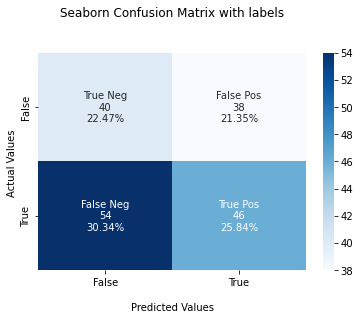

Classification Report: 
              precision    recall  f1-score   support

           0       0.43      0.51      0.47        78
           1       0.55      0.46      0.50       100

    accuracy                           0.48       178
   macro avg       0.49      0.49      0.48       178
weighted avg       0.49      0.48      0.48       178

Accuracy:  0.48314606741573035


In [82]:
rosX_train, rosX_test, rosy_train, rosy_test = train_test_split(x_ros, y_ros, test_size=0.2, random_state=1)
ros_svm_clf = svm.SVC()
ros_svm_clf.fit(rosX_train, rosy_train)
# print('Original dataset shape', Counter(y))
# print('Resample dataset shape', Counter(y_ros))

# testing the model
ros_svm_ypred = ros_svm_clf.predict(rosX_test)
# taking the 
ros_svm_result = confusion_matrix(rosy_test, ros_svm_ypred)

group_counts = ["{0:0.0f}".format(value) for value in ros_svm_result.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     ros_svm_result.flatten()/np.sum(ros_svm_result)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(ros_svm_result, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

ros_svm_result1 = classification_report(rosy_test, ros_svm_ypred)
print("Classification Report: ")
print(ros_svm_result1)

ros_svm_result2 = accuracy_score(rosy_test, ros_svm_ypred)
print("Accuracy: ", ros_svm_result2)


In [47]:
rosAll = pd.concat([x_ros, y_ros], ignore_index=True, sort=False)

In [53]:
rosAll  = x_ros.copy()
rosAll = rosAll.join(y_ros)
# x_ros.dtype


In [54]:
rosAll.to_excel("./data/rosAll.xlsx")

In [55]:
# join and save the random undersampled data dataframe
rusAll  = x_rus.copy()
rusAll = rusAll.join(y_rus)
rusAll.to_excel("./data/rusAll.xlsx")


>**Decision Tree**
Using oversampled data

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# dtree_rus = DecisionTreeClassifier(random_state=0)
# cross_val_score(dtree_rus, x_rus, y_rus, cv=10)
dtree_clf_rus = tree.DecisionTreeClassifier()
dtree_clf_rus = dtree_clf_rus.fit(x_rus, y_rus)

rosX_train, rosX_test, rosy_train, rosy_test

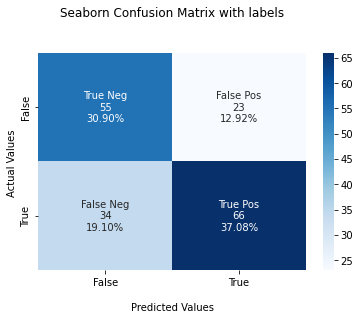

Classification Report: 
              precision    recall  f1-score   support

           0       0.62      0.71      0.66        78
           1       0.74      0.66      0.70       100

    accuracy                           0.68       178
   macro avg       0.68      0.68      0.68       178
weighted avg       0.69      0.68      0.68       178

Accuracy:  0.6797752808988764


In [84]:
# for undersampled data

dtree_clf_ros = tree.DecisionTreeClassifier()
dtree_clf_ros = dtree_clf_ros.fit(rosX_train, rosy_train)

# testing the model
ros_dtree_ypred = dtree_clf_ros.predict(rosX_test)
# taking the 
ros_dtree_result = confusion_matrix(rosy_test, ros_dtree_ypred)

group_counts = ["{0:0.0f}".format(value) for value in ros_dtree_result.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     ros_dtree_result.flatten()/np.sum(ros_dtree_result)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(ros_dtree_result, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

ros_dtree_result1 = classification_report(rosy_test, ros_dtree_ypred)
print("Classification Report: ")
print(ros_dtree_result1)

ros_dtree_result2 = accuracy_score(rosy_test, ros_dtree_ypred)
print("Accuracy: ", ros_dtree_result2)

>**Machine Learning Perceptron**

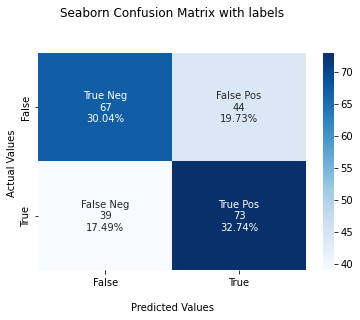

Classification Report: 
              precision    recall  f1-score   support

           0       0.63      0.60      0.62       111
           1       0.62      0.65      0.64       112

    accuracy                           0.63       223
   macro avg       0.63      0.63      0.63       223
weighted avg       0.63      0.63      0.63       223

Accuracy:  0.6278026905829597


In [85]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

rosDataAll = pd.read_excel("./data/rosAll.xlsx")
y_data = rosDataAll['Outcome']
x_data = rosDataAll[["Age", "Sex", "Symptomatic"]]

MinMaxScaler = preprocessing.MinMaxScaler()

X_data_minmax = MinMaxScaler.fit_transform(x_data)

x_data = pd.DataFrame(X_data_minmax, columns=["Age", "Sex", "Symptomatic"])

rosX_train, rosX_test, rosy_train, rosy_test = train_test_split(x_data, y_data, stratify=y_data, random_state=1)
ros_MLP_clf = MLPClassifier(random_state=1, max_iter=300).fit(rosX_train, rosy_train)

# ros_MLP_clf.score(rosX_test, rosy_test)

# testing the model
ros_MLP_ypred = ros_MLP_clf.predict(rosX_test)

# taking the 
ros_MLP_result = confusion_matrix(rosy_test, ros_MLP_ypred)

group_counts = ["{0:0.0f}".format(value) for value in ros_MLP_result.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     ros_MLP_result.flatten()/np.sum(ros_MLP_result)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(ros_MLP_result, annot=labels, fmt='', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

ros_MLP_result1 = classification_report(rosy_test, ros_MLP_ypred)
print("Classification Report: ")
print(ros_MLP_result1)

ros_MLP_result2 = accuracy_score(rosy_test, ros_MLP_ypred)
print("Accuracy: ", ros_MLP_result2)


# Ensemble

In [54]:
# !pip install xgboost

### List of analytics libraries: 
Sklearn 0.23.2<br>
XGBoost 1.3.3<br>
Pandas 1.1.3<br>
Numpy 1.18.5<br>
Seaborn 0.11.0

In [74]:
import sklearn
import xgboost as xgb
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [75]:
# ML Algorithms used 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs


## Dataset Loading and EDA

In [80]:
# Load in the train and test dataset
data = pd.read_excel("./data/rosAll.xlsx")
train = data.iloc[:712, 1:]
test = data.iloc[713:, 1:]

train.head(5)

,Age,Sex,Symptomatic,Outcome
0,48,0,0,0
1,16,1,0,0
2,63,0,1,1
3,39,1,0,0
4,56,0,1,0


In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          712 non-null    int64
 1   Sex          712 non-null    int64
 2   Symptomatic  712 non-null    int64
 3   Outcome      712 non-null    int64
dtypes: int64(4)
memory usage: 22.4 KB


In [82]:
train.dtypes

Age            int64
Sex            int64
Symptomatic    int64
Outcome        int64
dtype: object

In [83]:
train.describe

<bound method NDFrame.describe of      Age  Sex  Symptomatic  Outcome
0     48    0            0        0
1     16    1            0        0
2     63    0            1        1
3     39    1            0        0
4     56    0            1        0
..   ...  ...          ...      ...
707   20    1            0        1
708   54    0            0        1
709   27    0            0        1
710   30    1            0        1
711   38    1            0        1

[712 rows x 4 columns]>

## Visualizing the data properties

In [84]:
# Checking the number of rows having null values
train[train.columns[train.isnull().any()]].isnull().sum()

Series([], dtype: float64)

0    0.625
1    0.375
Name: Outcome, dtype: float64


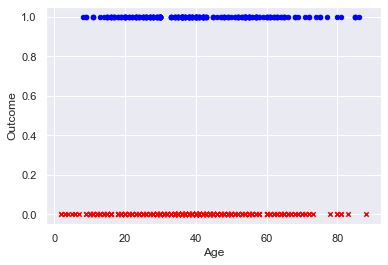

In [85]:
print(train['Outcome'].value_counts()/len(train))
fig, ax = plt.subplots()
markers = ['x', 'o']
for i in range(2):
    if i == 0:
        color = 'red'
    else: color = 'blue'
    train[train['Outcome'].eq(i)].plot.scatter(x='Age', y='Outcome', marker=markers[i], color = color, ax=ax)

<AxesSubplot:>

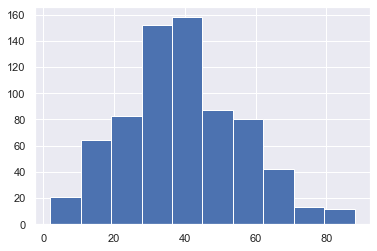

In [86]:
train['Age'].hist()

C:\Users\Jenyo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Jenyo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



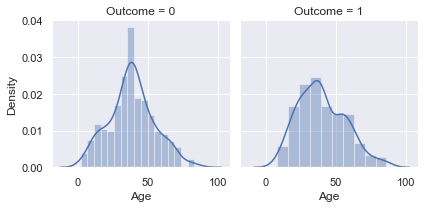

In [87]:
# Age/survived columns comparison
graph = sns.FacetGrid(train, col="Outcome")
graph.map(sns.distplot, "Age")

Text(0, 0.5, 'Probability')

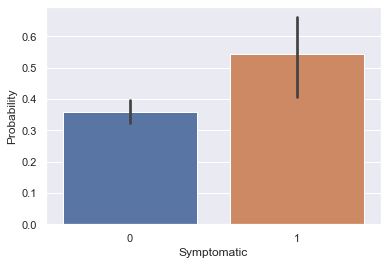

In [88]:
# Probability of infection based on symptomatic display
graph = sns.barplot(x="Symptomatic", y="Outcome", data=train)
graph.set_ylabel("Probability")

## Feature Exploration, Engineering and Cleaning

In [89]:
# Applying the pipeline on training/testing data
full_dataset=[train, test]

In [90]:
train.columns

Index(['Age', 'Sex', 'Symptomatic', 'Outcome'], dtype='object')

#### Feature Selection

In [18]:
#Feature Selection
data = data[["Age", "Sex", "Symptomatic", "Outcome"]]
X = data.drop(["Outcome"], axis=1)
y = data["Outcome"]
x_train, x_test, y_train, y_test = train_test_split(X, y)

#### Visualizations

In [91]:
train.head(10)

,Age,Sex,Symptomatic,Outcome
0,48,0,0,0
1,16,1,0,0
2,63,0,1,1
3,39,1,0,0
4,56,0,1,0
5,34,1,0,0
6,85,1,1,1
7,50,0,0,0
8,70,1,1,0
9,74,1,0,1


<AxesSubplot:title={'center':'Pearson correlation of features'}>

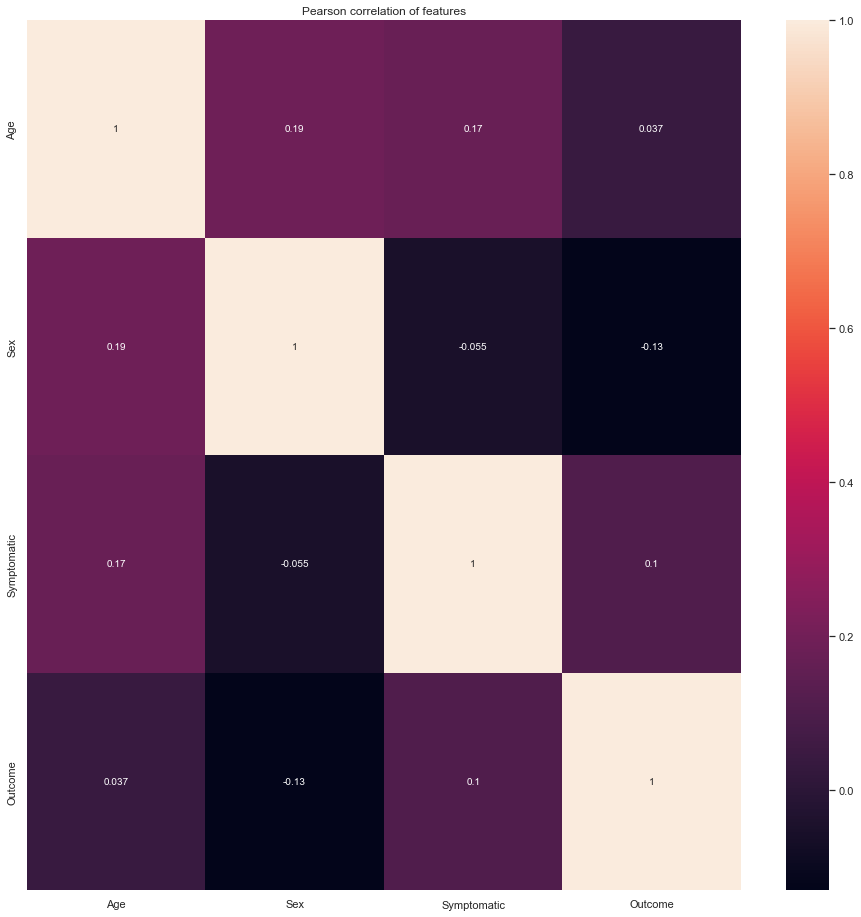

In [92]:
colormap = plt.cm.RdBu
plt.figure(figsize=(16,16))
plt.title('Pearson correlation of features')
sns.heatmap(train.astype(float).corr(), annot=True)

## Ensembling and Stacking Models

We will use different algorithms and techniques; therefore, we will create a model object to increase code reusability.

In [93]:
# Model Class to be used for different ML algorithms
class ClassifierModel(object):
    def __init__(self, clf, params=None):
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        return self.clf.fit(x,y).feature_importances_
    
    def predict(self, x):
        return self.clf.predict(x)
        

In [94]:
# Create Numpy arrays of train, test and target( Outcome) dataframes to feed into our models 
y_train = train['Outcome'].ravel()
train = train.drop(['Outcome'], axis=1)
x_train = train.values # Create an array of the train data
x_test = test.values # Creates an array of the test data

In [96]:
def trainModel(model, x_train, y_train, x_test, n_folds, seed):
    cv = KFold(n_splits= n_folds, random_state=seed)
    scores = cross_val_score(model.clf, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    y_pred = cross_val_predict(model.clf, x_train, y_train, cv=cv, n_jobs=-1)
    return scores, y_pred

#### Random Forest Classifier

In [122]:
# Random Forest parameters
rf_params = {
    'n_estimators': 400,
    'max_depth': 5,
    'min_samples_leaf': 3,
    'max_features' : 'sqrt',
}
rfc_model = ClassifierModel(clf=RandomForestClassifier, params=rf_params)
rfc_scores, rfc_train_pred = trainModel(rfc_model,x_train, y_train, x_test, 5, None)
rfc_scores

array([0.65034965, 0.70629371, 0.6971831 , 0.62676056, 0.5       ])

In [98]:
# Getting features importance
rfc_features = rfc_model.feature_importances(x_train, y_train)
rfc_features

array([0.8033147 , 0.12537295, 0.07131235])

#### Extra Trees Classifier

In [103]:
# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':400,
    'max_depth': 5,
    'min_samples_leaf': 2,
}
etc_model = ClassifierModel(clf=ExtraTreesClassifier, params=et_params)
etc_scores, etc_train_pred = trainModel(etc_model,x_train, y_train, x_test, 5, None) # Random Forest
etc_scores

array([0.67832168, 0.62937063, 0.69014085, 0.63380282, 0.3943662 ])

In [100]:
etc_features = etc_model.feature_importances(x_train, y_train)
etc_features

array([0.51860106, 0.30171053, 0.17968842])

#### AdaBoost Classifier

In [105]:
# AdaBoost parameters
ada_params = {
    'n_estimators': 400,
    'learning_rate' : 0.65
}
ada_model = ClassifierModel(clf=AdaBoostClassifier, params=ada_params)
ada_scores, ada_train_pred = trainModel(ada_model,x_train, y_train, x_test, 5, None) # Random Forest
ada_scores

array([0.55944056, 0.62937063, 0.67605634, 0.65492958, 0.42253521])

In [104]:
# Getting features importance
ada_features = ada_model.feature_importances(x_train, y_train)
ada_features

array([0.99  , 0.0075, 0.0025])

#### XGBoost Classifier

In [106]:
# Gradient Boosting parameters
gb_params = {
    'n_estimators': 400,
    'max_depth': 6,
}
gbc_model = ClassifierModel(clf=GradientBoostingClassifier, params=gb_params)
gbc_scores, gbc_train_pred = trainModel(gbc_model,x_train, y_train, x_test, 5, None) # Random Forest
gbc_scores

array([0.59440559, 0.62237762, 0.66901408, 0.5915493 , 0.55633803])

In [107]:
# Getting features importances
gbc_features = gbc_model.feature_importances(x_train, y_train)
gbc_features

array([0.77034321, 0.11812762, 0.11152918])

### Support Vector Classifier

In [109]:
# Support Vector Classifier Parameters
svc_params = {
    'kernel': 'linear',
    'C': 0.025
}
svc_model = ClassifierModel(clf=SVC, params=svc_params)
svc_scores, svc_train_pred = trainModel(svc_model,x_train, y_train, x_test, 5, None) # Random Forest
svc_scores

array([0.77622378, 0.63636364, 0.68309859, 0.67605634, 0.35211268])

#### Feature importance

In [113]:
# Create a dataframe with features
feature_dataframe = pd.DataFrame( {
    'features': train.columns.values,
    'Random Forest feature importances': rfc_features,
    'Extra Trees feature importances': etc_features,
    'AdaBoost feature importances': ada_features,
    'Gradient Boost feature importance': gbc_features

})

In [114]:
# Create the new column containing the average of values
feature_dataframe['mean'] = feature_dataframe.mean(axis=1)
feature_dataframe

C:\Users\Jenyo\AppData\Local\Temp/ipykernel_20328/1869061000.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,features,Random Forest feature importances,Extra Trees feature importances,AdaBoost feature importances,Gradient Boost feature importance,mean
0,Age,0.803315,0.518601,0.9900,0.770343,0.770565
1,Sex,0.125373,0.301711,0.0075,0.118128,0.138178
2,Symptomatic,0.071312,0.179688,0.0025,0.111529,0.091257


In [115]:
y = feature_dataframe['mean'].values
x = feature_dataframe['features'].values
data = [go.Bar(
            x= x,
             y= y,
            width = 0.5,
            marker=dict(
               color = feature_dataframe['mean'].values,
            colorscale='Portland',
            showscale=True,
            reversescale = False
            ),
            opacity=0.6
        )]

layout= go.Layout(
    autosize= True,
    title= 'Barplots of Mean Feature Importance',
    hovermode= 'closest',
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bar-direct-labels')

In [119]:
acc_pred_train = pd.DataFrame ({
    'RandomForest': rfc_scores[0],
     'ExtraTrees': etc_scores[0],
     'AdaBoost': ada_scores[0],
      'GradientBoost': gbc_scores[0]
    })
acc_pred_train.head()

,RandomForest,ExtraTrees,AdaBoost,GradientBoost
0,0.650350,0.678322,0.559441,0.594406
1,0.706294,0.678322,0.559441,0.594406
2,0.697183,0.678322,0.559441,0.594406
3,0.640845,0.678322,0.559441,0.594406
4,0.500000,0.678322,0.559441,0.594406


<AxesSubplot:title={'center':'Pearson correlation of features'}>

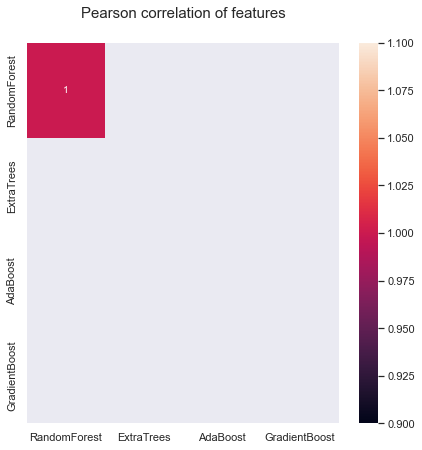

In [121]:
colormap = plt.cm.RdBu
plt.figure(figsize=(7,7))
plt.title('Pearson correlation of features', y=1.05, size=15)
sns.heatmap(acc_pred_train.astype(float).corr(), annot=True)

### Feature Importances

In [110]:
x_train = np.column_stack(( etc_train_pred, rfc_train_pred, ada_train_pred, gbc_train_pred, svc_train_pred))


In [123]:
x_train.shape

(712, 3)

In [124]:
acc_pred_train

,RandomForest,ExtraTrees,AdaBoost,GradientBoost
0,0.650350,0.678322,0.559441,0.594406
1,0.706294,0.678322,0.559441,0.594406
2,0.697183,0.678322,0.559441,0.594406
3,0.640845,0.678322,0.559441,0.594406
4,0.500000,0.678322,0.559441,0.594406


In [125]:
def trainStackModel(x_train, y_train, x_test, n_folds, seed):
    cv = KFold(n_splits= n_folds, random_state=seed)
    gbm = xgb.XGBClassifier(
     n_estimators= 2000,
     max_depth= 4,
     min_child_weight= 2,
     gamma=0.9,                        
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'binary:logistic',
     scale_pos_weight=1).fit(x_train, y_train)
    
    scores = cross_val_score(gbm, x_train, y_train, scoring='accuracy', cv=cv)
    return scores

In [127]:
stackModel_scores = trainStackModel(x_train, y_train, x_test, 5, None)


C:\Users\Jenyo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:17:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jenyo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:18:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jenyo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:18:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jenyo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:18:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jenyo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:18:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jenyo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:18:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [128]:
acc_pred_train['stackingModel'] = stackModel_scores
acc_pred_train

,RandomForest,ExtraTrees,AdaBoost,GradientBoost,stackingModel
0,0.650350,0.678322,0.559441,0.594406,0.615385
1,0.706294,0.678322,0.559441,0.594406,0.615385
2,0.697183,0.678322,0.559441,0.594406,0.661972
3,0.640845,0.678322,0.559441,0.594406,0.619718
4,0.500000,0.678322,0.559441,0.594406,0.542254


Build stacking model where a new stronger model learns from the predictions from all 4 weaker models

In [52]:
# x_train = np.column_stack(( etc_scores, rfc_scores, ada_scores, gbc_scores))
x_train = np.column_stack(( etc_train_pred, rfc_train_pred, ada_train_pred, gbc_train_pred, svc_train_pred))


In [61]:
x_train.shape

(5, 4)

##### Correlation between classifiers XGBoost, AdaBoost, Extra Trees and Random Forest Classifiers predictions

In [48]:
import numpy as np
np.concatenate
all_pred = pd.DataFrame({"ExtraTrees":etc_scores, "RandomForest": rfc_scores, "Adaboost": ada_scores, "XGBoost": gbc_scores})
# all_pred.rename(rows={0: "Extra Trees", 1: "Random Forest", 2: "AdaBoost", 3: "XGBoost"}, inplace=True)
pearsons_ = all_pred.corr(method='pearson')
pearsons_

,ExtraTrees,RandomForest,Adaboost,XGBoost
ExtraTrees,1.000000,0.820454,-0.177440,0.153670
RandomForest,0.820454,1.000000,-0.552776,0.149901
Adaboost,-0.177440,-0.552776,1.000000,0.522037
XGBoost,0.153670,0.149901,0.522037,1.000000


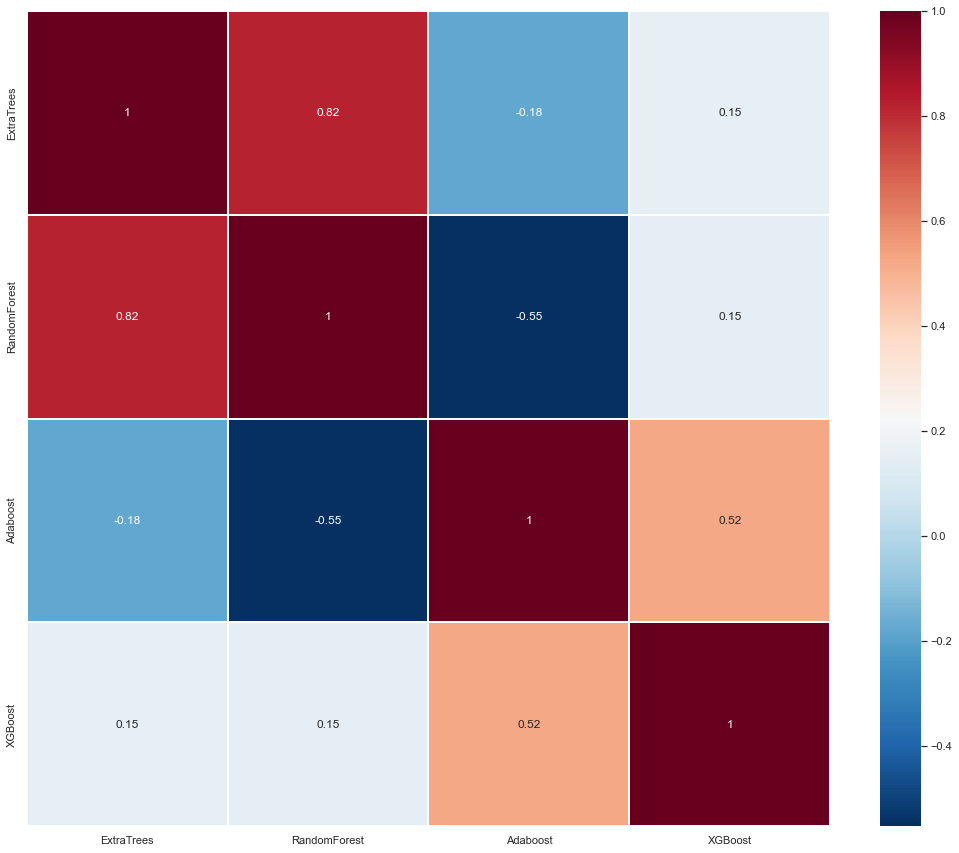

In [51]:
# To improve visualization, we generate a plot of this result
sns.set(rc = {'figure.figsize':(18,15)})
corr_seaborn_plot = sns.heatmap(pearsons_, 
            xticklabels=pearsons_.columns,
            yticklabels=pearsons_.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
figure = corr_seaborn_plot.get_figure()    
# figure.savefig('./images/Pearson_corr_coef_seaborn_dp.png', dpi=400)

In [56]:
def trainStackModel(x_train, y_train, x_test, n_folds, seed):
    cv = KFold(n_splits= n_folds, random_state=seed)
    gbm = xgb.XGBClassifier(
     n_estimators= 2000,
     max_depth= 4,
     min_child_weight= 2,
     gamma=0.9,                        
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'binary:logistic',
     scale_pos_weight=1).fit(x_train, y_train)
    
    scores = cross_val_score(gbm, x_train, y_train, scoring='accuracy', cv=cv)
    return scores

In [129]:
tsm_scores = trainStackModel(x_train, y_train, x_test, 5, None)

C:\Users\Jenyo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:58:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jenyo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:58:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jenyo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:58:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jenyo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:58:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jenyo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:58:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jenyo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:58:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [59]:
y_train

569    1
211    0
195    1
762    1
868    1
      ..
604    0
401    1
497    0
795    1
498    1
Name: Outcome, Length: 667, dtype: int64

<AxesSubplot:>

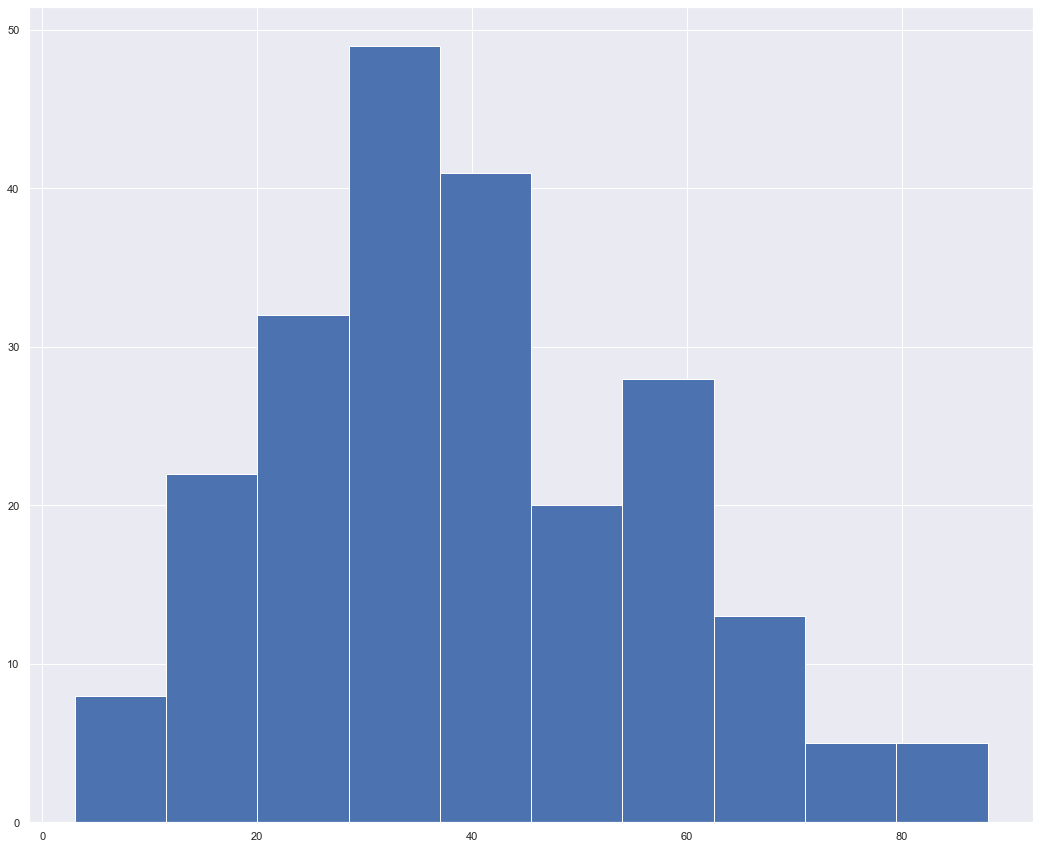

In [60]:
x_test['Age'].hist()